## Paquetes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from dateutil import relativedelta
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import math

## Datasets

In [2]:
datasets_path = "/Users/francisco/Documents/Practica/Time-Series-Library/Resultados/datasets/"

In [3]:
coffee_df  = pd.read_csv(datasets_path+ 'Coffee_500Exog.csv')
coffee_results_df=  pd.read_csv(datasets_path+ 'Coffee_500Exog_results.csv')
sugar_df  = pd.read_csv(datasets_path+ 'Sugar_500Exog.csv')
sugar_results_df =  pd.read_csv(datasets_path+ 'Sugar_500Exog_results.csv')


## Funciones utiles

In [4]:
def load_squeeze(path):
    pred = np.load(path+'pred.npy')
    true = np.load(path+'true.npy')
    dates = np.load(path+'dates.npy')
    preds = np.squeeze(pred)
    trues = np.squeeze(true)
    dates = np.squeeze(dates)
    return dates,trues,preds

In [5]:
def create_df(n,dates,trues,preds,xrnn,df):
    #Dataframe predicciones
    date_s = pd.Series(dates[n])
    date = pd.to_datetime(date_s, format='%Y%m%d')
    true_df = pd.DataFrame(trues[n])
    pred_df = pd.DataFrame(preds[n])
    date_df = date.to_frame()
    times_df = pd.concat([date_df,true_df,pred_df],axis=1)

    times_df.columns = ['date', 'true', 'times' ]
    times_df.set_index('date',inplace=True)
    ## Dataframe xrnn
    xrnn = xrnn.iloc[:,[0,3]]
    xrnn.set_index('date',inplace=True)
    xrnn.index = pd.to_datetime(xrnn.index)
    ## Dataframe timesnet + xrnn
    total_df = times_df.join(xrnn,on='date')
    total_df.columns = [ 'True', 'Times', 'Xrnn']
    ## Dataframe contexto
    context = df.iloc[:,[0,2]]
    context.set_index('date',inplace=True)
    context.index = pd.to_datetime(context.index)
    ## Dataframe timesnet + xrnn + contexto
    with_context =context.join(total_df, on='date')
    return with_context,total_df

In [6]:
def truncate(n, decimals=0):
    multiplier = 10 ** decimals
    return int(n * multiplier) / multiplier

In [7]:
def calc_metrics(y_actual, y_predicted):
    MSE = truncate(mean_squared_error(y_actual, y_predicted),2)
    RMSE = truncate(math.sqrt(MSE),2)
    MAE = truncate(mean_absolute_error(y_actual, y_predicted),2)
    MAPE = truncate(mean_absolute_percentage_error(y_actual, y_predicted),2)
    print("MSE: {} ---RMSE: {} ---MAE: {} ---MAPE: {}".format(MSE, RMSE, MAE, MAPE))

# Resultados Cafe

## Original

- Resultados obtenidos al utilizar el dataset de cafe para entrenamiento y el dataset de cafe para pruebas.

In [8]:
path_coffee_test_results = '/Users/francisco/Documents/Practica/Time-Series-Library/Resultados/az_train/test_cafe/'

In [9]:
virtual_present_coffee = '2021-12-13'
virtual_present_coffee = datetime.strptime(virtual_present_coffee, "%Y-%m-%d")
test_start_coffee = virtual_present_coffee - relativedelta.relativedelta(weeks=52)

In [10]:
date,true,pred = load_squeeze(path_coffee_test_results)

In [11]:
coffee_test_result_wc,coffee_test_result_woc = create_df(0,date,true,pred,coffee_results_df,coffee_df)

In [12]:
w_context = coffee_test_result_wc[coffee_test_result_wc.index>test_start_coffee]

In [13]:
wo_context = coffee_test_result_woc[coffee_test_result_woc.index>test_start_coffee]

<Axes: xlabel='date'>

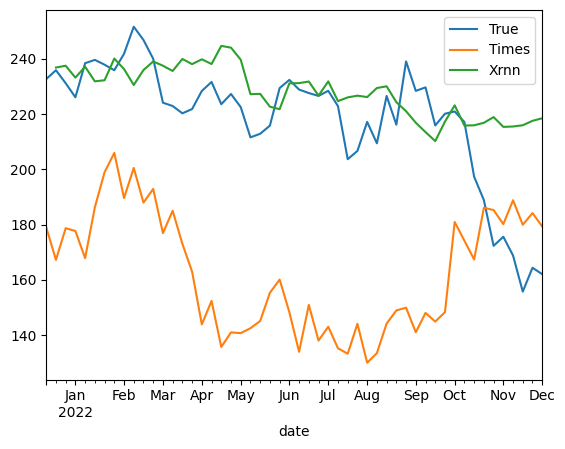

In [14]:
wo_context.plot()


<Axes: xlabel='date'>

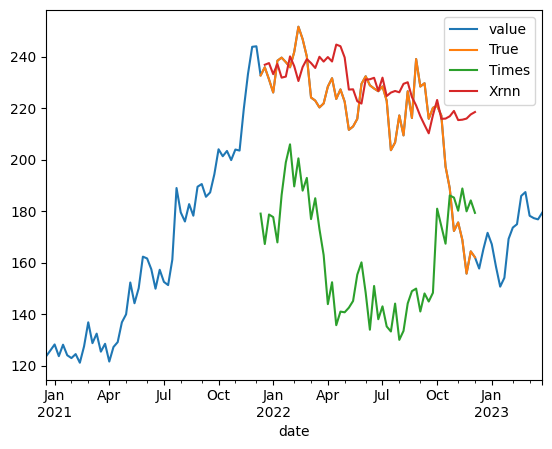

In [15]:
w_context.plot()

In [16]:
xrnn_values =  coffee_results_df['units'].to_numpy()

In [17]:
calc_metrics(true[0],xrnn_values)

MSE: 429.19 ---RMSE: 20.71 ---MAE: 14.36 ---MAPE: 0.07


In [18]:
calc_metrics(true[0],pred[0])

MSE: 4104.4 ---RMSE: 64.06 ---MAE: 59.25 ---MAPE: 0.26


## Prediccion azucar 

- Prediccion realizada por el modelo de cafe al utilizar el dataset de azucar.

In [19]:
path_az_test_results = '/Users/francisco/Documents/Practica/Time-Series-Library/Resultados/ca_train/test_az/'

In [20]:
virtual_present_az = '2022-04-04'
virtual_present_az = datetime.strptime(virtual_present_az, "%Y-%m-%d")

virtual_present_az = virtual_present_az - relativedelta.relativedelta(weeks=1)
test_start_az = virtual_present_az - relativedelta.relativedelta(weeks=52)

In [21]:
date_az,true_az,pred_az = load_squeeze(path_az_test_results)

In [22]:
az_test_result_wc,az_test_result_woc = create_df(0,date_az,true_az,pred_az,sugar_results_df,sugar_df)

In [23]:
w_context = az_test_result_wc[az_test_result_wc.index>test_start_az]

In [24]:
wo_context = az_test_result_woc[az_test_result_woc.index>test_start_az]

<Axes: xlabel='date'>

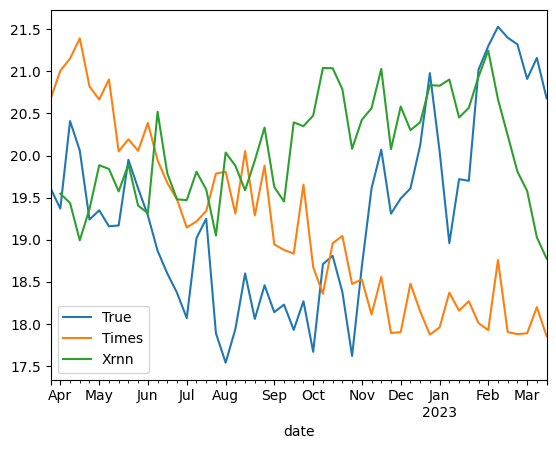

In [25]:
wo_context.plot()


<Axes: xlabel='date'>

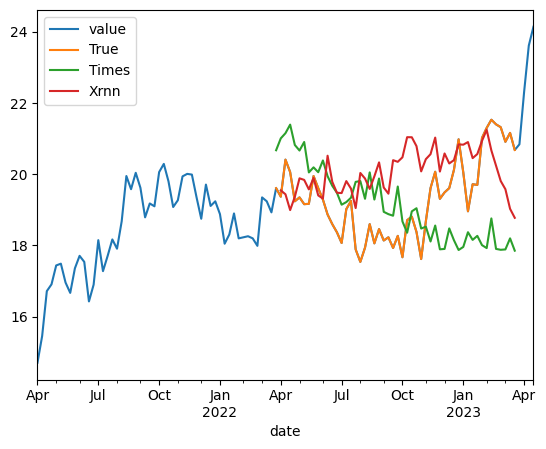

In [26]:
w_context.plot()

In [27]:
xrnn_values =  sugar_results_df['units'].to_numpy()

In [28]:
calc_metrics(true_az[0],xrnn_values)
calc_metrics(true_az[0],pred_az[0])

MSE: 2.21 ---RMSE: 1.48 ---MAE: 1.26 ---MAPE: 0.06
MSE: 2.95 ---RMSE: 1.71 ---MAE: 1.46 ---MAPE: 0.07


# Resultados Azucar


## Original

## 

In [29]:
path_az_test_results = '/Users/francisco/Documents/Practica/Time-Series-Library/Resultados/az_train/test_az/'

In [30]:
virtual_present_az = '2022-04-04'
virtual_present_az = datetime.strptime(virtual_present_az, "%Y-%m-%d")

virtual_present_az = virtual_present_az - relativedelta.relativedelta(weeks=1)
test_start_az = virtual_present_az - relativedelta.relativedelta(weeks=52)

In [31]:
date_az,true_az,pred_az = load_squeeze(path_az_test_results)

In [32]:
az_test_result_wc,az_test_result_woc = create_df(0,date_az,true_az,pred_az,sugar_results_df,sugar_df)

In [33]:
w_context = az_test_result_wc[az_test_result_wc.index>test_start_az]

In [34]:
wo_context = az_test_result_woc[az_test_result_woc.index>test_start_az]

<Axes: xlabel='date'>

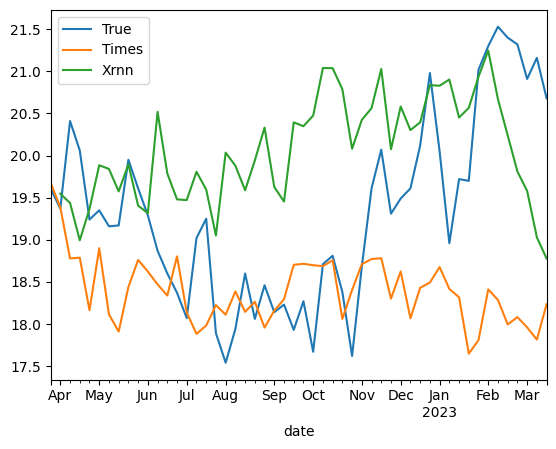

In [35]:
wo_context.plot()

<Axes: xlabel='date'>

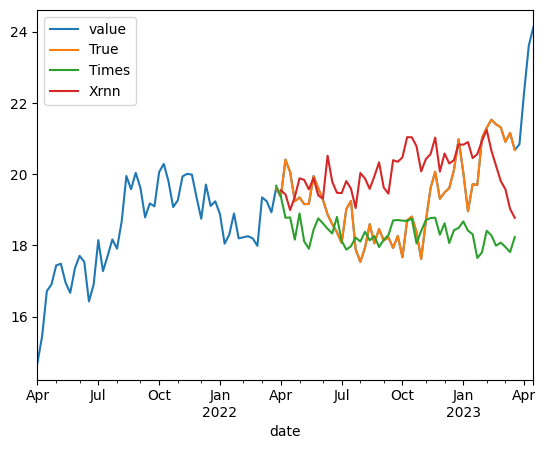

In [36]:
w_context.plot()

In [37]:
sugar_results_df.head()

,date,item,model,units,rmse,smape,forecast_accuracy,bias,lower,upper
0,2022-04-04,Sugar,xrnn,19.546572,0.176572,0.907437,99.088427,0.009033,18.787300,20.305843
1,2022-04-11,Sugar,xrnn,19.437195,0.972805,4.882678,95.233684,-0.050049,18.400523,20.473867
2,2022-04-18,Sugar,xrnn,18.994003,1.065997,5.459091,94.685959,-0.056123,17.781500,20.206506
3,2022-04-25,Sugar,xrnn,19.365982,0.125982,0.652656,99.345208,0.006505,18.043387,20.688577
4,2022-05-02,Sugar,xrnn,19.885237,0.535237,2.728347,97.233919,0.026916,18.486431,21.284042


In [38]:
xrnn_values =  sugar_results_df['units'].to_numpy()

In [39]:
calc_metrics(true_az[0],xrnn_values)
calc_metrics(true_az[0],pred_az[0])


MSE: 2.21 ---RMSE: 1.48 ---MAE: 1.26 ---MAPE: 0.06
MSE: 2.3 ---RMSE: 1.51 ---MAE: 1.14 ---MAPE: 0.05


##  Prediccion cafe

In [40]:
path_coffee_test_results = '/Users/francisco/Documents/Practica/Time-Series-Library/Resultados/az_train/test_cafe/'

In [41]:
virtual_present_coffee = '2021-12-13'
virtual_present_coffee = datetime.strptime(virtual_present_coffee, "%Y-%m-%d")
test_start_coffee = virtual_present_coffee - relativedelta.relativedelta(weeks=52)

In [42]:
date,true,pred = load_squeeze(path_coffee_test_results)

In [43]:
coffee_test_result_wc,coffee_test_result_woc = create_df(0,date,true,pred,coffee_results_df,coffee_df)

In [44]:
w_context = coffee_test_result_wc[coffee_test_result_wc.index>test_start_coffee]

In [45]:
wo_context = coffee_test_result_woc[coffee_test_result_woc.index>test_start_coffee]

<Axes: xlabel='date'>

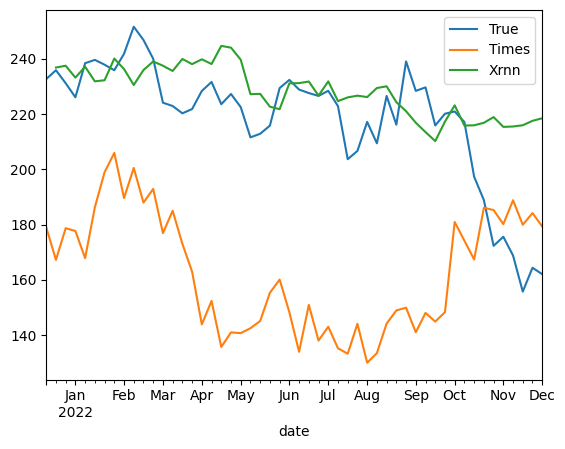

In [46]:
wo_context.plot()

<Axes: xlabel='date'>

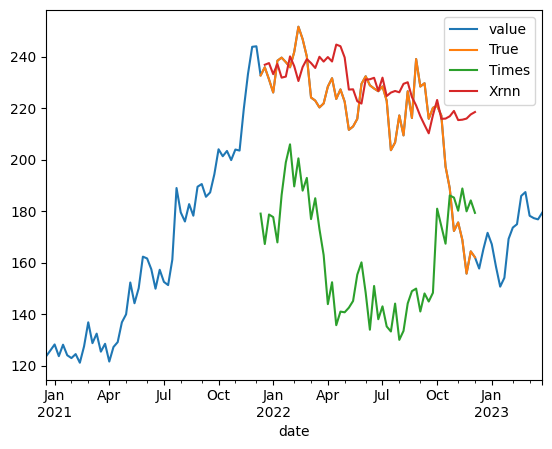

In [47]:
w_context.plot()

In [48]:
xrnn_values =  coffee_results_df['units'].to_numpy()

In [49]:
calc_metrics(true[0],pred[0])
calc_metrics(true[0],xrnn_values)

MSE: 4104.4 ---RMSE: 64.06 ---MAE: 59.25 ---MAPE: 0.26
MSE: 429.19 ---RMSE: 20.71 ---MAE: 14.36 ---MAPE: 0.07


## Proximos experimentos

- Probar diferentes presentes virtuales (parametrizando) \ 


- Revisar las fechas y agregar parametro para guardar experimentes \ 
- Guardar metricas y generar funciones para cada experimento \  *
- Probar con mas datos  acordar a felipe\ 
- Revisar los hiperparametros(dmodel - factor) \
- Probar distintos modelos 
- Simplificar codigo y crear  funcion de prediccion solo con datos de prueba.
- Experimentos con bootstrapping